# Time Series Modeling

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

Time series are widely used for non-stationary data, like economic, weather, stock price, and retail sales in this post. We will demonstrate different approaches for forecasting retail sales time series. Let’s get started!

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
sns.set(style="whitegrid")

## Loading Superstore Sales Data

In [21]:
data = pd.read_excel("Superstore.xls")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Data Preprocessing

This step includes filtering categories, removing columns we do not need, check missing values, aggregate sales by date and so on.

First thing first, there are several categories in the Superstore sales data, we start from time series analysis and forecasting for furniture sales.

In [70]:
print('Suersore categories: ', data.Category.unique())
furniture = data.loc[data['Category'] == 'Furniture']
furniture.head()

Suersore categories:  ['Furniture' 'Office Supplies' 'Technology']


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


### Data Validation (Time Range, Missing Values)

In [23]:
print('Time range:', furniture['Order Date'].min(), 'to', furniture['Order Date'].max())

Time range: 2014-01-06 00:00:00 to 2017-12-30 00:00:00


In [95]:
print('Verify missing valuse')
furniture.isnull().sum()

Verify missing valuse


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Extract order year, month, day

The `apply()` method can be applied both to series and dataframes where function can be applied both series and individual elements based on the type of function provided. The function passed as an argument typically works on rows/columns.

The `map()` method only works on a pandas series where type of operation to be applied depends on argument passed as a function, dictionary or a list. This method is generally used to map values from two series having one column same.

In [140]:
furniture.loc[:,'Order Year'] = furniture['Order Date'].apply(lambda x: x.year)
furniture.loc[:,'Order Month'] = furniture['Order Date'].apply(lambda x: x.month)
furniture.loc[:,'Order Day'] = furniture['Order Date'].map(lambda x: x.day)
furniture.loc[:, ['Order Year','Order Month','Order Day']].head()

,Order Year,Order Month,Order Day
0,2016,11,8
1,2016,11,8
3,2015,10,11
5,2014,6,9
10,2014,6,9


### Data Aggregation

The `groupby` method can be used to aggregate our data by specific columns.

On the other hand, the `resample()` method also allow us to do aggregation, but we need set timestamp as index in advance.

In [125]:
furniture_sales = furniture.groupby(['Order Year', 'Order Month'])['Sales'].agg(['mean'])
furniture_sales.head(12)

mean
Order Year Order Month            
2014       1            312.126250
           2            262.808286
           3            441.635030
           4            305.570654
           5            288.032792
           6            440.204187
           7            327.910636
           8            305.014437
           9            425.294300
           10           384.507719
           11           347.820527
           12           414.134682

In [160]:
x = furniture.set_index('Order Date')['Sales'].resample('MS').mean()['2014':]
x.head(12)

Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014438
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
Freq: MS, Name: Sales, dtype: float64

## Exploratory Data Analysis

The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year.

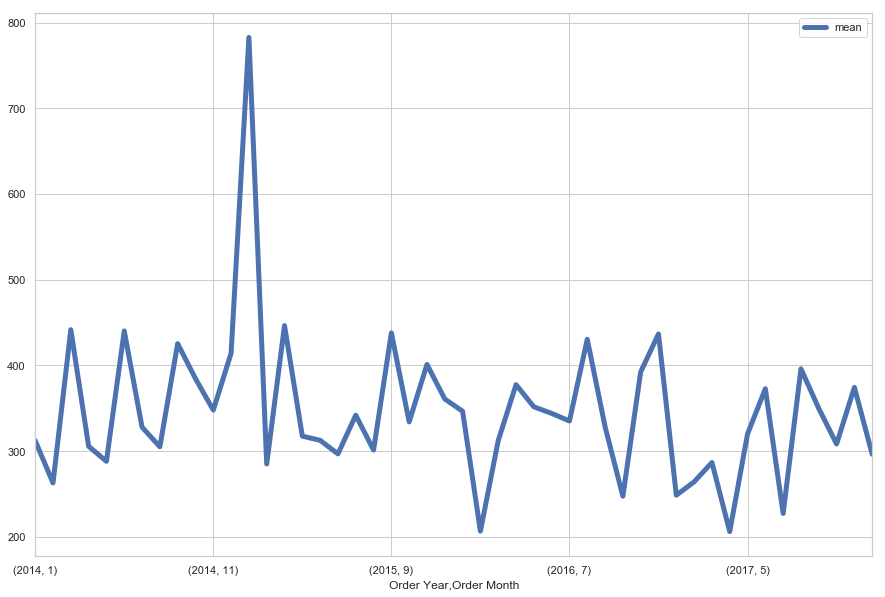

In [158]:
furniture_sales.plot(figsize=(15, 10), linewidth=5)
plt.show()

We can also visualize our data using a method called `time-series decomposition` that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

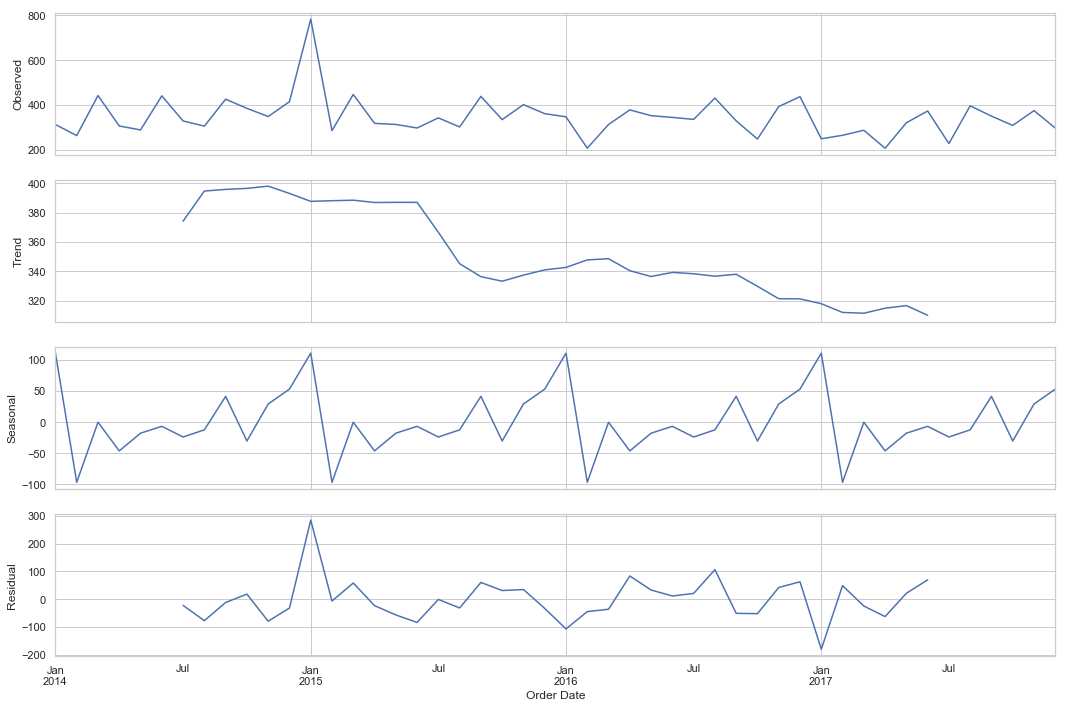

In [161]:
from pylab import rcParams

rcParams['figure.figsize'] = 15, 10
decomposition = sm.tsa.seasonal_decompose(x, model='additive')
fig = decomposition.plot()
plt.show()

## Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

ARIMA models are denoted with the notation $ARIMA(p, d, q)$. These three parameters account for seasonality, trend, and noise in data. The step is parameter selection for our furnitures's sales ARIMA time series model. Our goal here is to use `grid search` to find the optimal set of parameters that acheive the best performance for model.

In [67]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('ARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('ARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('ARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('ARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
ARIMAX: (0, 0, 1) x (0, 0, 1, 12)
ARIMAX: (0, 0, 1) x (0, 1, 0, 12)
ARIMAX: (0, 1, 0) x (0, 1, 1, 12)
ARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results = mod.fit()
print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue